# Análise de treinamentos

### Imports

In [16]:
from os.path import join

from scripts.analysis import plot_training_loss
from scripts.definitions import RESULTS_PATH

### Configurações

In [17]:
MODEL_NAME = 'LLaDerm-0.3-11B'
EVENT_FILE_PATH = join('outputs', 'runs', 'v0.3')

### Plot

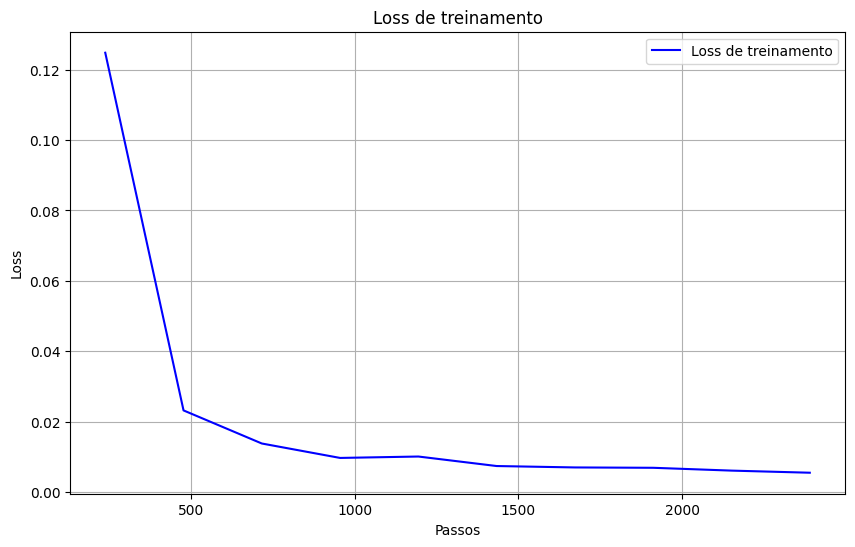

Estatísticas de loss de treinamento:
count    10.000000
mean      0.021450
std       0.036693
min       0.005500
25%       0.006925
50%       0.008550
75%       0.012875
max       0.124800
dtype: float64


In [18]:
plot_training_loss(EVENT_FILE_PATH, join(RESULTS_PATH, 'plots', f'training_loss_{MODEL_NAME}.png'))